In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [43]:
bow_stemmed_matrix = np.load('../../processed_files/bow/bow_matrix.npy')
#bow_stemmed_matrix = scipy.sparse.load_npz('../../processed_files/tfidf/tfidf_matrix.npz')
df = pickle.load(open("../../processed_files/webis/df.pickle", "rb"))

In [44]:
bow_stemmed_matrix.shape

(15718, 80513)

In [45]:
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comte, would, spurn, irrational, reason...",[even m. comte would spurn such irrational rea...
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, shortest, easiest, way...",[picture illustrating the shortest and easiest...
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[picture, exemplifies, straight, easiest, way,...",[this picture exemplifies the straight and eas...
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, course, bill, going, get, sooner, later...","[thad, of course. and, bill, we're going to ge..."


In [46]:
df.shape

(15718, 7)

In [47]:
type(bow_stemmed_matrix[0])

numpy.ndarray

## DB Scan

In [48]:
from sklearn.cluster import DBSCAN

In [49]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(bow_stemmed_matrix)

In [50]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [51]:
num_clusters = max(dbscan.labels_)
num_clusters

399

In [52]:
dbscan

DBSCAN(eps=0.1)

In [53]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

-1

In [54]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [55]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [56]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  335
cluster:  1 size:  5
cluster:  2 size:  5
cluster:  3 size:  5
cluster:  4 size:  5
cluster:  5 size:  5
cluster:  6 size:  52
cluster:  7 size:  5
cluster:  8 size:  5
cluster:  9 size:  7
cluster:  10 size:  5
cluster:  11 size:  5
cluster:  12 size:  5
cluster:  13 size:  5
cluster:  14 size:  5
cluster:  15 size:  9
cluster:  16 size:  5
cluster:  17 size:  5
cluster:  18 size:  6
cluster:  19 size:  7
cluster:  20 size:  8
cluster:  21 size:  6
cluster:  22 size:  5
cluster:  23 size:  13
cluster:  24 size:  7
cluster:  25 size:  11
cluster:  26 size:  6
cluster:  27 size:  6
cluster:  28 size:  8
cluster:  29 size:  5
cluster:  30 size:  5
cluster:  31 size:  7
cluster:  32 size:  8
cluster:  33 size:  5
cluster:  34 size:  12
cluster:  35 size:  7
cluster:  36 size:  11
cluster:  37 size:  8
cluster:  38 size:  5
cluster:  39 size:  6
cluster:  40 size:  5
cluster:  41 size:  7
cluster:  42 size:  5
cluster:  43 size:  9
cluster:  44 size:  5
cluster:  45 

In [57]:
len(cluster_list[0])

335

In [58]:
len(cluster_list[1])

5

In [59]:
len(cluster_list[2])

5

In [60]:
len(cluster_list[num_clusters-1])

6

In [61]:
cluster_list[1]

[(1, 340), (1, 341), (1, 342), (1, 344), (1, 14688)]

In [62]:
#print(clusters.labels_.shape)

In [63]:
[i[1] for i in cluster_list[0]]

[109,
 149,
 433,
 467,
 537,
 681,
 873,
 915,
 2033,
 2043,
 2993,
 3075,
 3425,
 4367,
 4789,
 5463,
 5469,
 5485,
 6115,
 6375,
 7127,
 7409,
 7579,
 7655,
 7741,
 7793,
 7903,
 7931,
 7971,
 8075,
 8145,
 8169,
 8257,
 8329,
 8449,
 8461,
 8517,
 8559,
 8569,
 8721,
 9087,
 9195,
 9249,
 9319,
 9597,
 9653,
 9831,
 9879,
 9897,
 9929,
 9933,
 10013,
 10107,
 10141,
 10147,
 10233,
 10273,
 10321,
 10361,
 10427,
 10473,
 10587,
 10685,
 10703,
 10721,
 10725,
 10815,
 10831,
 11485,
 11673,
 11693,
 11859,
 12023,
 12109,
 12193,
 12437,
 12451,
 12453,
 12457,
 12463,
 12477,
 12485,
 12499,
 12503,
 12513,
 12515,
 12517,
 12529,
 12531,
 12541,
 12545,
 12551,
 12573,
 12583,
 12589,
 12607,
 12613,
 12621,
 12633,
 12647,
 12651,
 12655,
 12661,
 12677,
 12681,
 12685,
 12705,
 12711,
 12715,
 12719,
 12727,
 12733,
 12747,
 12751,
 12763,
 12769,
 12775,
 12781,
 12791,
 12793,
 12805,
 12809,
 12821,
 12831,
 12833,
 12847,
 12853,
 12865,
 12871,
 12877,
 12887,
 12901,
 12

In [64]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    print('bow_stemmed_matrix shape: ', bow_stemmed_matrix.shape)
    print()
    print('index: ', index)
    print()
    print('cluster_list length: ', len(cluster_list))
    print()
    print('cluster_list[', index, ']: ', cluster_list[index])
    print()
    print('[i]: ', [i[1] for i in cluster_list[index]])
    print()
    print('bow_stemmed_matrix[i[1]]: ', bow_stemmed_matrix[[i[1] for i in cluster_list[index]]])
    print()
    cluster_centroid = np.average(bow_stemmed_matrix[[i[1] for i in cluster_list[index]]], axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-bow_stemmed_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [65]:
intracluster_similarity(0)

bow_stemmed_matrix shape:  (15718, 80513)

index:  0

cluster_list length:  399

cluster_list[ 0 ]:  [(0, 109), (0, 149), (0, 433), (0, 467), (0, 537), (0, 681), (0, 873), (0, 915), (0, 2033), (0, 2043), (0, 2993), (0, 3075), (0, 3425), (0, 4367), (0, 4789), (0, 5463), (0, 5469), (0, 5485), (0, 6115), (0, 6375), (0, 7127), (0, 7409), (0, 7579), (0, 7655), (0, 7741), (0, 7793), (0, 7903), (0, 7931), (0, 7971), (0, 8075), (0, 8145), (0, 8169), (0, 8257), (0, 8329), (0, 8449), (0, 8461), (0, 8517), (0, 8559), (0, 8569), (0, 8721), (0, 9087), (0, 9195), (0, 9249), (0, 9319), (0, 9597), (0, 9653), (0, 9831), (0, 9879), (0, 9897), (0, 9929), (0, 9933), (0, 10013), (0, 10107), (0, 10141), (0, 10147), (0, 10233), (0, 10273), (0, 10321), (0, 10361), (0, 10427), (0, 10473), (0, 10587), (0, 10685), (0, 10703), (0, 10721), (0, 10725), (0, 10815), (0, 10831), (0, 11485), (0, 11673), (0, 11693), (0, 11859), (0, 12023), (0, 12109), (0, 12193), (0, 12437), (0, 12451), (0, 12453), (0, 12457), (0, 12463

(0.0, 0.0)

In [66]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = d.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [67]:
generate_raw_content_cluster_df(10)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
10,1002,original.txt,1002-original.txt,For example: There is a saying of the Emperor ...,True,"[example, saying, emperor, tschun, bc, teach, ...",[for example: there is a saying of the emperor...,10
1156,1519,original.txt,1519-original.txt,I. CHAP. I. Passion for Travelling--Author's...,False,"[chap, passion, travellingauthors, peculiar, s...",[i. chap. i. passion for travelling--author'...,10
1157,1519,paraphrase.txt,1519-paraphrase.txt,I. CHAP. I. Passion for Travelling--Author's ...,False,"[chap, passion, travellingauthors, peculiar, s...",[i. chap. i. passion for travelling--author's...,10
1160,1520,original.txt,1520-original.txt,I. CHAP. I. Passion for Travelling--Author's...,True,"[chap, passion, travellingauthors, peculiar, s...",[i. chap. i. passion for travelling--author'...,10
1162,1521,original.txt,1521-original.txt,I. CHAP. I. Passion for Travelling--Author's...,False,"[chap, passion, travellingauthors, peculiar, s...",[i. chap. i. passion for travelling--author'...,10


In [68]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

bow_stemmed_matrix shape:  (15718, 80513)

index:  0

cluster_list length:  399

cluster_list[ 0 ]:  [(0, 109), (0, 149), (0, 433), (0, 467), (0, 537), (0, 681), (0, 873), (0, 915), (0, 2033), (0, 2043), (0, 2993), (0, 3075), (0, 3425), (0, 4367), (0, 4789), (0, 5463), (0, 5469), (0, 5485), (0, 6115), (0, 6375), (0, 7127), (0, 7409), (0, 7579), (0, 7655), (0, 7741), (0, 7793), (0, 7903), (0, 7931), (0, 7971), (0, 8075), (0, 8145), (0, 8169), (0, 8257), (0, 8329), (0, 8449), (0, 8461), (0, 8517), (0, 8559), (0, 8569), (0, 8721), (0, 9087), (0, 9195), (0, 9249), (0, 9319), (0, 9597), (0, 9653), (0, 9831), (0, 9879), (0, 9897), (0, 9929), (0, 9933), (0, 10013), (0, 10107), (0, 10141), (0, 10147), (0, 10233), (0, 10273), (0, 10321), (0, 10361), (0, 10427), (0, 10473), (0, 10587), (0, 10685), (0, 10703), (0, 10721), (0, 10725), (0, 10815), (0, 10831), (0, 11485), (0, 11673), (0, 11693), (0, 11859), (0, 12023), (0, 12109), (0, 12193), (0, 12437), (0, 12451), (0, 12453), (0, 12457), (0, 12463

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  35

cluster_list length:  399

cluster_list[ 35 ]:  [(35, 5214), (35, 5215), (35, 13120), (35, 13122), (35, 13124), (35, 13125), (35, 15148)]

[i]:  [5214, 5215, 13120, 13122, 13124, 13125, 15148]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  36

cluster_list length:  399

cluster_list[ 36 ]:  [(36, 5216), (36, 5217), (36, 5218), (36, 5219), (36, 12980), (36, 12982), (36, 12984), (36, 12985), (36, 12986), (36, 12987), (36, 15062)]

[i]:  [5216, 5217, 5218, 5219, 12980, 12982, 12984, 12985, 12986, 12987, 15062]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  73

cluster_list length:  399

cluster_list[ 73 ]:  [(73, 6050), (73, 6052), (73, 6054), (73, 6056), (73, 6057), (73, 6058)]

[i]:  [6050, 6052, 6054, 6056, 6057, 6058]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  74

cluster_list length:  399

cluster_list[ 74 ]:  [(74, 6062), (74, 13968), (74, 14946), (74, 14948), (74, 14950)]

[i]:  [6062, 13968, 14946, 14948, 14950]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  75

cluster_list length:  399

cluster_list[ 75 ]:  [(75, 6106), (75, 6107), (75, 12940), (75, 12941), (75, 12942), (75, 12944

bow_stemmed_matrix shape:  (15718, 80513)

index:  116

cluster_list length:  399

cluster_list[ 116 ]:  [(116, 6756), (116, 6757), (116, 13630), (116, 13632), (116, 13634), (116, 13636), (116, 13637), (116, 14998)]

[i]:  [6756, 6757, 13630, 13632, 13634, 13636, 13637, 14998]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  117

cluster_list length:  399

cluster_list[ 117 ]:  [(117, 6766), (117, 14416), (117, 14418), (117, 14420), (117, 14424), (117, 14425), (117, 15160), (117, 15162)]

[i]:  [6766, 14416, 14418, 14420, 14424, 14425, 15160, 15162]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  118

cluster_list length:  399

cluster_list[ 118 ]:  [(118, 6794), (118, 6795), (118, 13584)

bow_stemmed_matrix shape:  (15718, 80513)

index:  159

cluster_list length:  399

cluster_list[ 159 ]:  [(159, 8310), (159, 8314), (159, 8316), (159, 8317), (159, 8318), (159, 8319)]

[i]:  [8310, 8314, 8316, 8317, 8318, 8319]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  160

cluster_list length:  399

cluster_list[ 160 ]:  [(160, 8336), (160, 8338), (160, 8340), (160, 8342), (160, 8343)]

[i]:  [8336, 8338, 8340, 8342, 8343]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  161

cluster_list length:  399

cluster_list[ 161 ]:  [(161, 8372), (161, 8374), (161, 8376), (161, 8377), (161, 8380), (161, 8382), (161, 8383)]

[i]:  [8372, 8374, 8376, 8377, 8380, 8382, 8383]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]


bow_stemmed_matrix shape:  (15718, 80513)

index:  198

cluster_list length:  399

cluster_list[ 198 ]:  [(198, 9352), (198, 9354), (198, 9356), (198, 9357), (198, 9360), (198, 9361), (198, 9362)]

[i]:  [9352, 9354, 9356, 9357, 9360, 9361, 9362]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  199

cluster_list length:  399

cluster_list[ 199 ]:  [(199, 9364), (199, 9366), (199, 9368), (199, 9370), (199, 9372), (199, 14872), (199, 14873)]

[i]:  [9364, 9366, 9368, 9370, 9372, 14872, 14873]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  200

cluster_list length:  399

cluster_list[ 200 ]:  [(200, 9374), (200, 9376), (200, 9378), (200, 9382), (200, 9384)]

[i]:  [9374, 9376, 9378, 9382, 9

bow_stemmed_matrix shape:  (15718, 80513)

index:  249

cluster_list length:  399

cluster_list[ 249 ]:  [(249, 10128), (249, 10129), (249, 10130), (249, 10132), (249, 10136), (249, 12530), (249, 12532), (249, 12533), (249, 12536), (249, 15210)]

[i]:  [10128, 10129, 10130, 10132, 10136, 12530, 12532, 12533, 12536, 15210]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  250

cluster_list length:  399

cluster_list[ 250 ]:  [(250, 10138), (250, 10140), (250, 10142), (250, 10144), (250, 13954), (250, 13958), (250, 13960)]

[i]:  [10138, 10140, 10142, 10144, 13954, 13958, 13960]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  251

cluster_list length:  399

cluster_list[ 251 ]:  [(251, 10180

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  301

cluster_list length:  399

cluster_list[ 301 ]:  [(301, 11302), (301, 11316), (301, 11318), (301, 11319), (301, 11320), (301, 11322)]

[i]:  [11302, 11316, 11318, 11319, 11320, 11322]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  302

cluster_list length:  399

cluster_list[ 302 ]:  [(302, 11304), (302, 11306), (302, 11308), (302, 11310), (302, 11314)]

[i]:  [11304, 11306, 11308, 11310, 11314]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  303

cluster_list length:  399

cluster_list[ 303 ]:  [(303, 11330), (303

bow_stemmed_matrix shape:  (15718, 80513)

index:  359

cluster_list length:  399

cluster_list[ 359 ]:  [(359, 13360), (359, 13362), (359, 13364), (359, 13365), (359, 13366)]

[i]:  [13360, 13362, 13364, 13365, 13366]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  360

cluster_list length:  399

cluster_list[ 360 ]:  [(360, 13420), (360, 13422), (360, 13426), (360, 13428), (360, 13429)]

[i]:  [13420, 13422, 13426, 13428, 13429]

bow_stemmed_matrix[i[1]]:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

bow_stemmed_matrix shape:  (15718, 80513)

index:  361

cluster_list length:  399

cluster_list[ 361 ]:  [(361, 13496), (361, 13498), (361, 13500), (361, 13502), (361, 13504), (361, 13506), (361, 13507), (361, 13508)]

[i]:  [13496, 13498, 13500, 13502, 13504, 13506, 13507, 13508]

bow_stemmed_matrix[i[1]]:  [[

([<matplotlib.axis.XTick at 0x14bbb8cf8>,
 <a list of 11 Text xticklabel objects>)

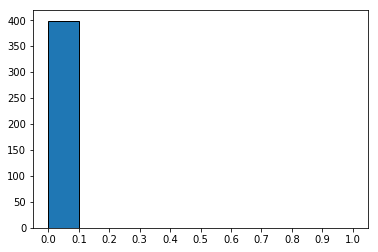

In [69]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [70]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(bow_stemmed_matrix[[x[1] for x in cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(bow_stemmed_matrix[[x[1] for x in cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [71]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 28.758231036450738
